In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data_sets/Heart Attack.csv')
df.head()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


In [3]:
df.rename(columns={'pressurehight':'pressurehigh'}, inplace=True)

In [4]:
df.columns

Index(['age', 'gender', 'impluse', 'pressurehigh', 'pressurelow', 'glucose',
       'kcm', 'troponin', 'class'],
      dtype='object')

In [5]:
df.isnull().sum()

age             0
gender          0
impluse         0
pressurehigh    0
pressurelow     0
glucose         0
kcm             0
troponin        0
class           0
dtype: int64

In [6]:
df.shape

(1319, 9)

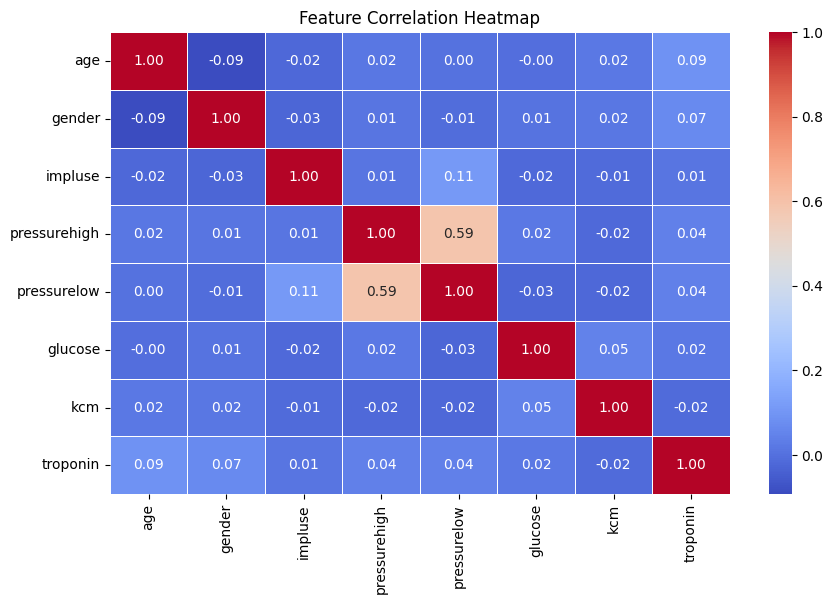

In [7]:
plt.figure(figsize=(10, 6))
df_corr = df.select_dtypes(include='number')
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Splitting data
X = df.drop(columns=['class'])  # Features
y = df['class']  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling features (important for some models)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.7992424242424242


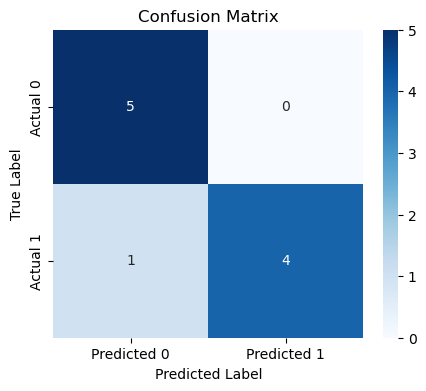

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Example: True labels and predicted probabilities
y_true = np.array([0, 0, 1, 1, 1, 0, 1, 0, 1, 0])  # Actual class labels
y_scores = np.array([0.1, 0.4, 0.35, 0.8, 0.9, 0.2, 0.75, 0.3, 0.85, 0.05])  # Predicted probabilities

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_scores)

# Find the optimal threshold (Youden's J statistic: max(TPR - FPR))
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

# Convert probabilities to binary predictions using the optimal threshold
y_pred = (y_scores >= optimal_threshold).astype(int)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [21]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.9810606060606061


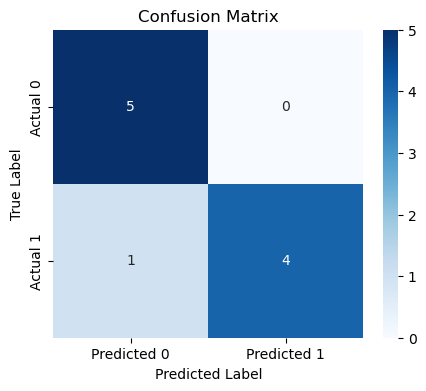

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Example: True labels and predicted probabilities
y_true = np.array([0, 0, 1, 1, 1, 0, 1, 0, 1, 0])  # Actual class labels
y_scores = np.array([0.1, 0.4, 0.35, 0.8, 0.9, 0.2, 0.75, 0.3, 0.85, 0.05])  # Predicted probabilities

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_scores)

# Find the optimal threshold (Youden's J statistic: max(TPR - FPR))
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

# Convert probabilities to binary predictions using the optimal threshold
y_pred = (y_scores >= optimal_threshold).astype(int)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [22]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV  

param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Initialize model
gb_clf = GradientBoostingClassifier()

# GridSearchCV (3-fold cross-validation)
grid_search = GridSearchCV(gb_clf, param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# Train model
grid_search.fit(X_train, y_train)

# Get best parameters
print("Best Parameters:", grid_search.best_params_)

# Train with best parameters
best_gb_clf = grid_search.best_estimator_

# Predict
y_pred = best_gb_clf.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"Tuned Gradient Boosting Accuracy: {accuracy:.4f}")


Best Parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200}
Tuned Gradient Boosting Accuracy: 0.9050


In [29]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

model = AdaBoostClassifier()  # Initialize without fixed hyperparameters

param_grid = {
    'n_estimators': [50],  # Try different numbers of estimators
    'learning_rate': [ 0.1]  # Try different learning rates
}

grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

best_gb_clf = grid_search.best_estimator_
y_pred = best_gb_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Tuned AdaBoost Accuracy: {accuracy:.4f}")

Best Parameters: {'learning_rate': 0.1, 'n_estimators': 50}
Tuned AdaBoost Accuracy: 0.8750
